0.378971411686


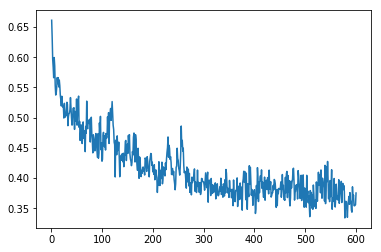

In [1]:
# write your code here
from sklearn.datasets import load_svmlight_file
from numpy import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random


def sigmoid(inX):
    return 1.0/(1+exp(-inX))

#只对数组索引进行随机排序
def shuffle_data_index(data_size):
    arr_index = []
    for i in range(data_size):
        arr_index.append(i)
    random.shuffle (arr_index)
    return arr_index

def cost(y,h):
#     print("-(",y,"*","log(",h,")+(1-",y,")*log(1-",h,")","=",-(y*log(h)+(1-y)*log(1-h)))
#     print(log(1-h))
    return -(y*log(h)+(1-y)*log(1-h))

def testLogRegres(w, X_test, y_test):
    total_cost=0
    shuffled_arr = shuffle_data_index(y_test.size)
    for m in range(1000): 
        index = shuffled_arr[m]
        if(y_test[index]==-1):
            ytr=0
        else:
            ytr=1
        h = float(sigmoid(w*X_test[index].T))   
        total_cost += cost(ytr,h)
        
    j = total_cost/(m+1)
    return j




t_X,t_y=load_svmlight_file("./a9a.txt")
t_X=t_X.todense()  
t_X_row_num,t_X_column_num=shape(t_X)

#在X矩阵中添加一列“1”
ones_column = ones((t_X_row_num,1)) 
t_X=hstack((ones_column,t_X))
t_X_column_num = t_X[0].size


#将数据集切分为训练集和验证集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( t_X, t_y, test_size=0.33, random_state=43)

alpha = 0.04

maxCycles = 600

w = zeros((1,t_X_column_num))

total_cost = 0
p_x=[]
p_train_loss=[]
p_test_loss=[]
p_train_loss2=[]
train_size = y_train.size
test_size=y_test.size
missCount=0

    
#一次迭代
shuffled_arr = shuffle_data_index(train_size)
for m in range(maxCycles): 
    index = shuffled_arr[m]
    if(y_train[index]==-1):
        ytr=0
    else:
        ytr=1
    h = float(sigmoid(w*X_train[index].T))   
    error = (h - ytr)          
    w = w - alpha * X_train[index]* error
#     total_cost += cost(ytr,h)
#     j = total_cost/(m+1)
    
    p_x.append(m+1)
#     p_train_loss.append(j)
    
    test_loss=testLogRegres(w, X_test, y_test)
    p_test_loss.append(test_loss)
    
    
# plt.plot(p_x, p_train_loss,label="train loss")
# print(p_train_loss[599])
plt.plot(p_x, p_test_loss,label="train loss")
print(p_test_loss[499])







In [ ]:
# write your code here
from sklearn.datasets import load_svmlight_file
from numpy import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random

def XNOR(a,b):
    if a==b:
        return 1
    return 0

#sigmoid函数
def sigmoid(inX):
    return 1.0/(1+exp(-inX))

#只对数组索引进行随机排序
def shuffle_data_index(data_size):
    arr_index = []
    for i in range(data_size):
        arr_index.append(i)
    random.shuffle (arr_index)
    return arr_index

#loss函数
def loss(y,h):
#     print("-(",y,"*","log(",h,")+(1-",y,")*log(1-",h,")","=",-(y*log(h)+(1-y)*log(1-h)))
    return -(y*log(h)+(1-y)*log(1-h))

#验证集上测试并得到Loss函数值
def testLogRegres(w, X_test, y_test):
    total_cost=0
    shuffled_arr = shuffle_data_index(y_test.size)
    for m in range(500): 
        index = shuffled_arr[m]
        if(y_test[index]==-1):
            ytr=0
        else:
            ytr=1
        h = float(sigmoid(w*X_test[index].T))   
        total_cost += loss(ytr,h)
        
    return total_cost/(m+1) 

#Loss函数对w求导
def loss_derivatived(w,X_train,y_train,index):
    h = float(sigmoid(w*X_train[index].T))   
    error = (h - y_train)   
    return X_train[index]* error

#数据处理
def data_process():
    t_X,t_y=load_svmlight_file("./a9a.txt")
    t_X=t_X.todense()  
    t_X_row_num,t_X_column_num=shape(t_X)

    #在X矩阵中添加一列“1”
    ones_column = ones((t_X_row_num,1)) 
    t_X=hstack((ones_column,t_X))
    t_X_column_num = t_X[0].size


    #将数据集切分为训练集和验证集
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split( t_X, t_y, test_size=0.33, random_state=43) 
    return X_train, X_test, y_train, y_test

def Regression_gradAscent(X_train, X_test, y_train, y_test,alpha,maxCycles):
    t_X_column_num=X_train[0].size
    w = zeros((1,t_X_column_num))

    p_x=[]
    p_train_loss=[]
    p_test_loss=[]

    train_size = y_train.size
    test_size=y_test.size

    shuffled_arr = shuffle_data_index(train_size)
    for m in range(maxCycles): 
        index = shuffled_arr[m]
        if(y_train[index]==-1):
            ytr=0
        else:
            ytr=1
        
        w = w - alpha * loss_derivatived(w,X_train,ytr,index)
        p_x.append(m+1)
        p_test_loss.append(testLogRegres(w, X_test, y_test))

    plt.plot(p_x, p_test_loss,label="train loss")
    print(p_test_loss[499])

def Regression_gradAscent_NAG(X_train, X_test, y_train, y_test,alpha,maxCycles):
    t_X_column_num=X_train[0].size
    train_size = y_train.size
    test_size=y_test.size
    
    w = zeros((1,t_X_column_num))
    v = zeros((1,t_X_column_num))
    gamma=0.7

    p_x=[]
    p_train_loss=[]
    p_test_loss=[]

    shuffled_arr = shuffle_data_index(train_size)
    for m in range(maxCycles): 
        index = shuffled_arr[m]
        if(y_train[index]==-1):
            ytr=0
        else:
            ytr=1
        v=gamma*v+alpha*loss_derivatived(w-gamma*v,X_train,ytr,index)
        w = w - v
        p_x.append(m+1)
        p_test_loss.append(testLogRegres(w, X_test, y_test))

    plt.plot(p_x, p_test_loss,label="train loss")
    print(p_test_loss[499])
    
def Regression_gradAscent_RMSprop(X_train, X_test, y_train, y_test,alpha,maxCycles):
    learning_rate=0.9
    decay_rate=0.001
    
    t_X_column_num=X_train[0].size
    w = zeros((1,t_X_column_num))
    r=0
    cache=0

    p_x=[]
    p_train_loss=[]
    p_test_loss=[]

    train_size = y_train.size
    test_size=y_test.size

    shuffled_arr = shuffle_data_index(train_size)
    for m in range(maxCycles): 
        index = shuffled_arr[m]
        if(y_train[index]==-1):
            ytr=0
        else:
            ytr=1
            
        dx=loss_derivatived(w,X_train,ytr,index)
        cache+=learning_rate*decay_rate+multiply((1-decay_rate)*dx,dx)
        w=w-learning_rate*dx/(np.sqrt(cache)+1e-7)

        p_x.append(m+1)
        p_test_loss.append(testLogRegres(w, X_test, y_test))

    plt.plot(p_x, p_test_loss,label="train loss")
    print(p_test_loss[499])
    

    
def main():
    X_train, X_test, y_train, y_test=data_process()
    alpha = 0.04
    maxCycles = 600
#     Regression_gradAscent(X_train, X_test, y_train, y_test,alpha,maxCycles)
#     Regression_gradAscent_NAG(X_train, X_test, y_train, y_test,alpha,maxCycles)
    Regression_gradAscent_RMSprop(X_train, X_test, y_train, y_test,alpha,maxCycles)
    
    
main()










In [40]:
a=[1 2 3,4 5 6]
print(a)

SyntaxError: invalid syntax (<ipython-input-40-7de6cab1292e>, line 1)

In [42]:
from numpy import *
a = np.matrix('1 2 7')
b = np.matrix('1 2 7')
multiply(a,b)


matrix([[ 1,  4, 49]])